# Project Name :- PRCP-1020-HousePricePred

#  PROJECT TEAM ID:- PTID-CDS-OCT-23-1665

##  Intorduction

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


## Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.

* Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

* Task 3 :-Suggestions to the Bank market team to make  customers  buy the product.


##  importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## step 1:- Load and read the dataset 

In [2]:
df= pd.read_csv('data.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
pd.set_option('display.max_columns',None) # to display the all columns of dataset

In [4]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

## step2 :- Domain analysis

* **MSSubClass** :- it is represents the typeof dwelling involved in the sale. It is a categorical variable that indicates the general class of the property
           
    Here are some common values you might encounter in the MSSubClass column:
    * 20: 1-STORY 1946 & NEWER ALL STYLES
    * 30: 1-STORY 1945 & OLDER
    * 40: 1-STORY W/FINISHED ATTIC ALL AGES
    * 45: 1-1/2 STORY - UNFINISHED ALL AGES
    * 50: 1-1/2 STORY FINISHED ALL AGES
    * 60: 2-STORY 1946 & NEWER
    * 70: 2-STORY 1945 & OLDER
    * 75: 2-1/2 STORY ALL AGES
    * 80: SPLIT OR MULTI-LEVEL
    * 85: SPLIT FOYER
    * 90: DUPLEX - ALL STYLES AND AGES
    * 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    * 150: 1-1/2 STORY PUD - ALL AGES
    * 160: 2-STORY PUD - 1946 & NEWER
    * 180: PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    * 190: 2 FAMILY CONVERSION - ALL STYLES AND AGES
        
* **MSZoning**:
Identifies the general zoning classification of the sale.
    A: Agriculture
    C (all): Commercial
    FV: Floating Village Residential
    I: Industrial
    RH: Residential High Density
    RL: Residential Low Density
    RP: Residential Low Density Park
    RM: Residential Medium Density        
        
* **LotFrontage** :--
The LotFrontage column in a housing dataset typically represents the linear
feet of street connected to the property. It denotes the length of the frontage or the
side of the property that is along the street. The frontage is the portion of the property 
that faces the road or street,and LotFrontage specifically measures how wide this portion is in linear feet.   

* **LotArea**: Lot size in square feet.
Values in the LotArea column are numerical, representing the total area of the land associated with each property.
Larger lot sizes generally provide more outdoor space but can also influence property values and potential land use.

* **Street**:--represents the type of road access tothe property. It describes the kind of street that the property is located on.
        Grvl: Gravel
        Pave: Paved
* **LotShape**:
        Describes the general shape of the property.
        Possible values:
            Reg: Regular (the property has a regular shape)
            IR1: Slightly irregular
            IR2: Moderately irregular
            IR3: Irregular

* **LandContour**:
        Describes the flatness of the property.
        Possible values:
            Lvl: Near Flat/Level
            Bnk: Banked - Quick and significant rise from street grade to building
            HLS: Hillside - Significant slope from side to side
            Low: Depression

*  **Utilities**:
        Describes the type of utilities available.
        Possible values:
            AllPub: All public Utilities (E,G,W,& S)
            NoSewr: Electricity, Gas, and Water (Septic Tank)
            NoSeWa: Electricity and Gas Only
            ELO: Electricity only

*    **LotConfig**:
        Describes the lot configuration or the way the property is situated.
        Possible values:
            Inside: Inside lot
            Corner: Corner lot
            CulDSac: Cul-de-sac
            FR2: Frontage on 2 sides of property
            FR3: Frontage on 3 sides of property

*    **LandSlope**:
        Describes the slope of the property.
        Possible values:
            Gtl: Gentle slope
            Mod: Moderate slope
            Sev: Severe slope
       
*   **Neighborhood**:
        Identifies the physical location within the Ames city limits.
        Examples of values:
            NAmes: North Ames
            CollgCr: College Creek
            OldTown: Old Town
            Edwards: Edwards
            ... and so on.

*    **Condition1**:
        Proximity to various conditions (e.g., a park, positive off-site feature).
        Examples of values:
            Norm: Normal
            Feedr: Adjacent to a feeder street
            Artery: Adjacent to arterial street
            RRAn: Within 200' of North-South Railroad

*    **Condition2**:
        Proximity to various conditions (if more than one is present).
        Examples of values are similar to Condition1.

*    **BldgType**:
        Type of dwelling.
        Possible values:
            1Fam: Single-family
            2fmCon: Two-family conversion; originally built as one-family dwelling
            Duplex: Duplex
            TwnhsE: Townhouse End Unit
            Twnhs: Townhouse Inside Unit

*    **HouseStyle**:
        Style of dwelling.
        Possible values:
            1Story: One story
            1.5Fin: One and a half story: 2nd level finished
            2Story: Two story
            2.5Fin: Two and a half story: 2nd level finished
            SLvl: Split Level
            SFoyer: Split Foyer
            1.5Unf: One and a half story: 2nd level unfinished
    
*    **OverallQual**:
        Represents the overall material and finish quality of the house.
        Values typically range from 1 to 10, where higher values indicate higher quality.
        Example: 10 represents Very Excellent, 1 represents Very Poor.

*    **OverallCond**:
        Represents the overall condition rating of the house.
        Values typically range from 1 to 10, where higher values indicate better condition.
        Example: 10 represents Very Excellent, 1 represents Very Poor.

*    **YearBuilt**:
        Represents the original construction date of the house.
        It is the year when the building was initially built.

*    **YearRemodAdd**:
        Represents the remodel date of the house.
        It is the year when the house was last remodeled or had an addition.

*    **RoofStyle**:
        Represents the style of the roof.
        Possible values:
            Flat: Flat
            Gable: Gable
            Gambrel: Gabrel (Barn)
            Hip: Hip
            Mansard: Mansard
            Shed: Shed
*    **RoofMatl**:
        Represents the material used for the roof.
        Examples of values:
            ClyTile: Clay or Tile
            CompShg: Standard (Composite) Shingle
            Membran: Membrane
            Metal: Metal
            Roll: Roll
            Tar&Grv: Gravel and Tar
            WdShake: Wood Shakes
            WdShngl: Wood Shingles

*    **Exterior1st**:
        Represents the exterior covering of the house.
        Examples of values:
            AsbShng: Asbestos Shingles
            AsphShn: Asphalt Shingles
            BrkComm: Brick Common
            BrkFace: Brick Face
            CBlock: Cinder Block
            CemntBd: Cement Board
            HdBoard: Hard Board
            ImStucc: Imitation Stucco
            MetalSd: Metal Siding
            Plywood: Plywood
            Stucco: Stucco
            VinylSd: Vinyl Siding
            Wd Sdng: Wood Siding
            WdShing: Wood Shingles

*    **MasVnrType**:
        Represents the masonry veneer type.
        Examples of values:
            BrkCmn: Brick Common
            BrkFace: Brick Face
            CBlock: Cinder Block
            None: None (no masonry veneer)
            Stone: Stone

*    **MasVnrArea**:
        Represents the masonry veneer area in square feet.
        It indicates the size of the masonry veneer on the house.

*    **ExterQual**:
        Represents the quality of the material on the exterior.
        Values typically include:
            Ex: Excellent
            Gd: Good
            TA: Average/Typical
            Fa: Fair
            Po: Poor
*    **ExterCond**:
        Represents the present condition of the material on the exterior.
        Values typically include:
            Ex: Excellent
            Gd: Good
            TA: Average/Typical
            Fa: Fair
            Po: Poor

*    **Foundation**:
        Represents the type of foundation.
        Examples of values:
            BrkTil: Brick & Tile
            CBlock: Cinder Block
            PConc: Poured Concrete
            Slab: Slab
            Stone: Stone
            Wood: Wood

*    **BsmtQual**:
        Represents the height of the basement.
        Values typically include:
            Ex: Excellent (100+ inches)
            Gd: Good (90-99 inches)
            TA: Typical (80-89 inches)
            Fa: Fair (70-79 inches)
            Po: Poor (<70 inches)
            NA: No Basement

*    **BsmtCond**:
        Represents the general condition of the basement.
        Values typically include:
            Ex: Excellent
            Gd: Good
            TA: Typical - slight dampness allowed
            Fa: Fair - dampness or some cracking or settling
            Po: Poor - Severe cracking, settling, or wetness
            NA: No Basement

*    **BsmtExposure**:
        Represents the walkout or garden level basement walls.
        Values typically include:
            Gd: Good Exposure
            Av: Average Exposure (split levels or foyers typically score average or above)
            Mn: Mimimum Exposure
            No: No Exposure
            NA: No Basement
                
*     **BsmtFinType1**:
        Represents the quality of the finished area in the basement.
        Values typically include:
            GLQ: Good Living Quarters
            ALQ: Average Living Quarters
            BLQ: Below Average Living Quarters
            Rec: Average Rec Room
            LwQ: Low Quality
            Unf: Unfinshed
            NA: No Basement

*    **BsmtFinSF1**:
        Represents the Type 1 finished square feet in the basement.

*    **BsmtFinType2**:
        Represents the quality of the second finished area in the basement (if present).
        Values are similar to BsmtFinType1.

*    **BsmtFinSF2**:
        Represents the Type 2 finished square feet in the basement (if present).

*    **BsmtUnfSF**:
        Represents the unfinished square feet of the basement area.               
                
*    **TotalBsmtSF**:
        Represents the total square feet of the basement area.

*    **Heating**:
        Represents the type of heating in the house.
        Examples of values:
            Floor: Floor Furnace
            GasA: Gas forced warm air furnace
            GasW: Gas hot water or steam heat
            Grav: Gravity furnace
            OthW: Hot water or steam heat other than gas
            Wall: Wall furnace

*    **HeatingQC**:
        Represents the heating quality and condition.
        Values typically include:
            Ex: Excellent
            Gd: Good
            TA: Average/Typical
            Fa: Fair
            Po: Poor

*    **CentralAir**:
        Indicates whether the house has central air conditioning.
        Values:
            Y: Yes
            N: No

*    **Electrical**:
        Represents the electrical system of the house.
        Examples of values:
            SBrkr: Standard Circuit Breakers & Romex
            FuseA: Fuse Box over 60 AMP and all Romex wiring (Average)
            FuseF: 60 AMP Fuse Box and mostly Romex wiring (Fair)
            FuseP: 60 AMP Fuse Box and mostly knob & tube wiring (poor)
            Mix: Mixed
*    **1stFlrSF**:
        Represents the first-floor square footage of the house.

*    **2ndFlrSF**:
        Represents the second-floor square footage of the house.

*    **LowQualFinSF**:
        Represents the low-quality finished square footage (all floors) of
        the house. Low quality refers to unfinished or low-grade materials.

*    **GrLivArea**:
        Represents the above-ground living area's square footage of the house. It typically excludes the basement area.

*    **BsmtFullBath**:
        Represents the number of full bathrooms in the basement.
        
*    **BsmtHalfBath**:
        Represents the number of half bathrooms (toilet and sink) in the basement.

*    **FullBath**:
        Represents the number of full bathrooms above grade (above ground).

*    **HalfBath**:
        Represents the number of half bathrooms above grade (above ground).

*    **BedroomAbvGr**:
        Represents the number of bedrooms above grade (above ground).

*    **KitchenAbvGr**:
        Represents the number of kitchens above grade (above ground).    
        
*    **KitchenQual**:
        Represents the quality of the kitchen.
        Values typically include:
            Ex: Excellent
            Gd: Good
            TA: Average/Typical
            Fa: Fair
            Po: Poor

*    **TotRmsAbvGrd**:
        Represents the total number of rooms above grade (above ground), excluding bathrooms.

*    **Functional**:
        Represents the home functionality rating.
        Values typically include:
            Typ: Typical Functionality
            Min1: Minor Deductions 1
            Min2: Minor Deductions 2
            Mod: Moderate Deductions
            Maj1: Major Deductions 1
            Maj2: Major Deductions 2
            Sev: Severely Damaged
            Sal: Salvage only

*    **Fireplaces**:
        Represents the number of fireplaces in the house.

*    **GarageType**:
        Represents the location of the garage.
        Examples of values:
            2Types: More than one type of garage
            Attchd: Attached to home
            Basment: Basement Garage
            BuiltIn: Built-in (Garage part of the main structure)
            CarPort: Car Port
            Detchd: Detached from home
            NA: No Garage

*     **GarageYrBlt**:
        Represents the year the garage was built.
        It indicates the construction year of the garage.

*    **GarageFinish**:
        Represents the interior finish of the garage.
        Values typically include:
            Fin: Finished
            RFn: Rough Finished
            Unf: Unfinished
            NA: No Garage

*    **GarageCars**:
        Represents the number of cars that can fit in the garage.
        It indicates the garage capacity in terms of the number of cars.

*    **GarageArea**:
        Represents the size of the garage in square feet.
        It indicates the total floor area of the garage.

*    **GarageQual**:
        Represents the quality of the garage.
        Values typically include:
            Ex: Excellent
            Gd: Good
            TA: Average/Typical
            Fa: Fair
            Po: Poor
            NA: No Garage
*    **GarageCond**:
        Represents the condition of the garage.
        Values typically include:
            Ex: Excellent
            Gd: Good
            TA: Average/Typical
            Fa: Fair
            Po: Poor
            NA: No Garage

*    **PavedDrive**:
        Represents whether the driveway is paved.
        Values typically include:
            Y: Paved
            P: Partial Pavement
            N: Dirt/Gravel

*    **WoodDeckSF**:
        Represents the wood deck area in square feet.

*    **OpenPorchSF**:
        Represents the open porch area in square feet.

*    **EnclosedPorch**:
        Represents the enclosed porch area in square feet.

*    **3SsnPorch**:
        Represents the three-season porch area in square feet.

*    **ScreenPorch**:
        Represents the screen porch area in square feet.

*    **PoolArea**:
        Represents the pool area in square feet.

*    **MiscVal**:
        Represents the value of miscellaneous features.

*    **MoSold**:
        Represents the month of sale.

*    **YrSold**:
        Represents the year of sale.

*   ** SaleType**:
        Represents the type of sale.
        Examples of values:
            WD: Warranty Deed - Conventional
            CWD: Warranty Deed - Cash
            VWD: Warranty Deed - VA Loan
            Con: Contract (any other type not defined above)
            New: Home just constructed and sold
            COD: Court Officer Deed/Estate
            ConLD: Contract Low Down payment
            ConLI: Contract Low Interest
            ConLw: Contract Low Net
            Con: Contract (any other type not defined above)

*    **SalePrice**:
        Represents the sale price of the house.                

## Basics Checks

In [5]:
# to see basic information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.head()   # to read first five rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
df.tail()  # to read last five rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [8]:
# Printing the number of rows and columns using the "shape()" function
df.shape

(1460, 81)

In [9]:
#to see descriptive statistics of numerical columns

df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
df.describe(include='O') # to see the statistics of columns which are objec datatype in the dataset

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [11]:
# Printing all the columns in  dataframe

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
# Checking null values present in the individual columns 
for i in df:
    l=df[i].isnull().sum()
    print(i," ",l)

Id   0
MSSubClass   0
MSZoning   0
LotFrontage   259
LotArea   0
Street   0
Alley   1369
LotShape   0
LandContour   0
Utilities   0
LotConfig   0
LandSlope   0
Neighborhood   0
Condition1   0
Condition2   0
BldgType   0
HouseStyle   0
OverallQual   0
OverallCond   0
YearBuilt   0
YearRemodAdd   0
RoofStyle   0
RoofMatl   0
Exterior1st   0
Exterior2nd   0
MasVnrType   8
MasVnrArea   8
ExterQual   0
ExterCond   0
Foundation   0
BsmtQual   37
BsmtCond   37
BsmtExposure   38
BsmtFinType1   37
BsmtFinSF1   0
BsmtFinType2   38
BsmtFinSF2   0
BsmtUnfSF   0
TotalBsmtSF   0
Heating   0
HeatingQC   0
CentralAir   0
Electrical   1
1stFlrSF   0
2ndFlrSF   0
LowQualFinSF   0
GrLivArea   0
BsmtFullBath   0
BsmtHalfBath   0
FullBath   0
HalfBath   0
BedroomAbvGr   0
KitchenAbvGr   0
KitchenQual   0
TotRmsAbvGrd   0
Functional   0
Fireplaces   0
FireplaceQu   690
GarageType   81
GarageYrBlt   81
GarageFinish   81
GarageCars   0
GarageArea   0
GarageQual   81
GarageCond   81
PavedDrive   0
WoodDeckSF  

there are so many null values present in the dataset

In [13]:
# to check the duplicated value in the dataframe

df.loc[df.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

there is no duplicated value present in the dataset

#  Exploratory Data Analysis

## Univariate analysis

In [14]:
dt=df.drop('Id',axis=1)

In [15]:
import sweetviz as sv
report=sv.analyze(dt)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

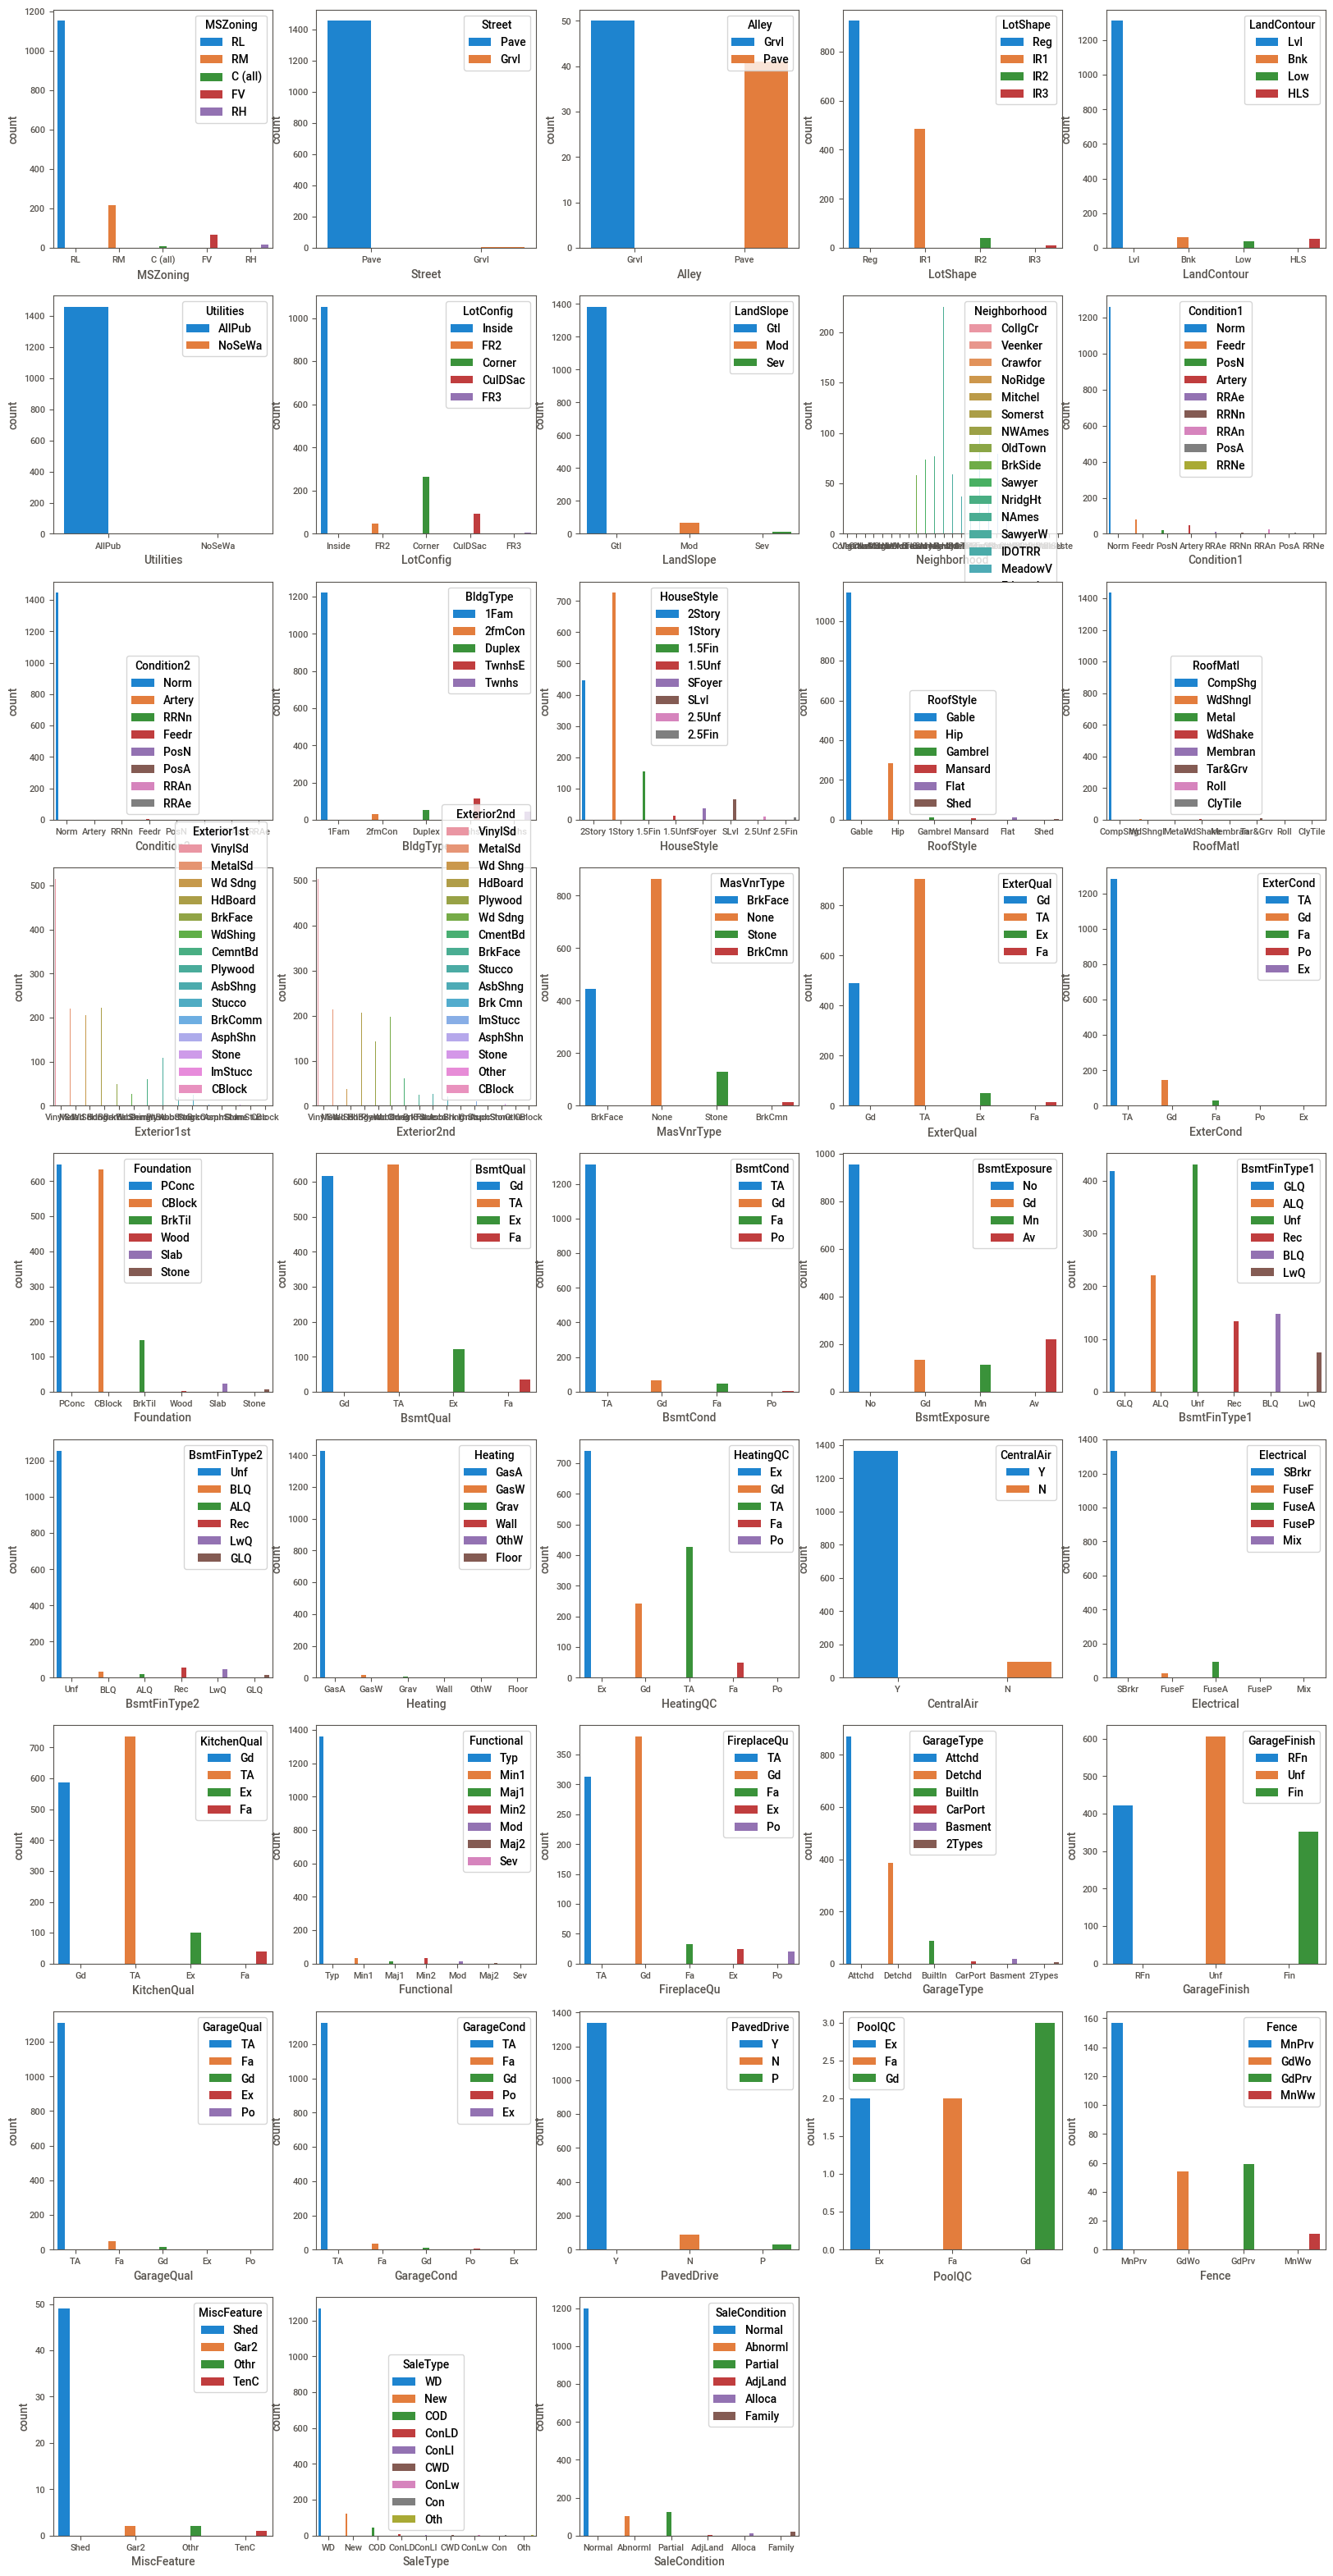

In [115]:
plt.figure(figsize=(20,50))
plotnumber=1
for i in df.select_dtypes(include='object'):
    plt.subplot(11,5,plotnumber)
    sns.countplot(data=dt,x=i,hue=i)
    plotnumber+=1

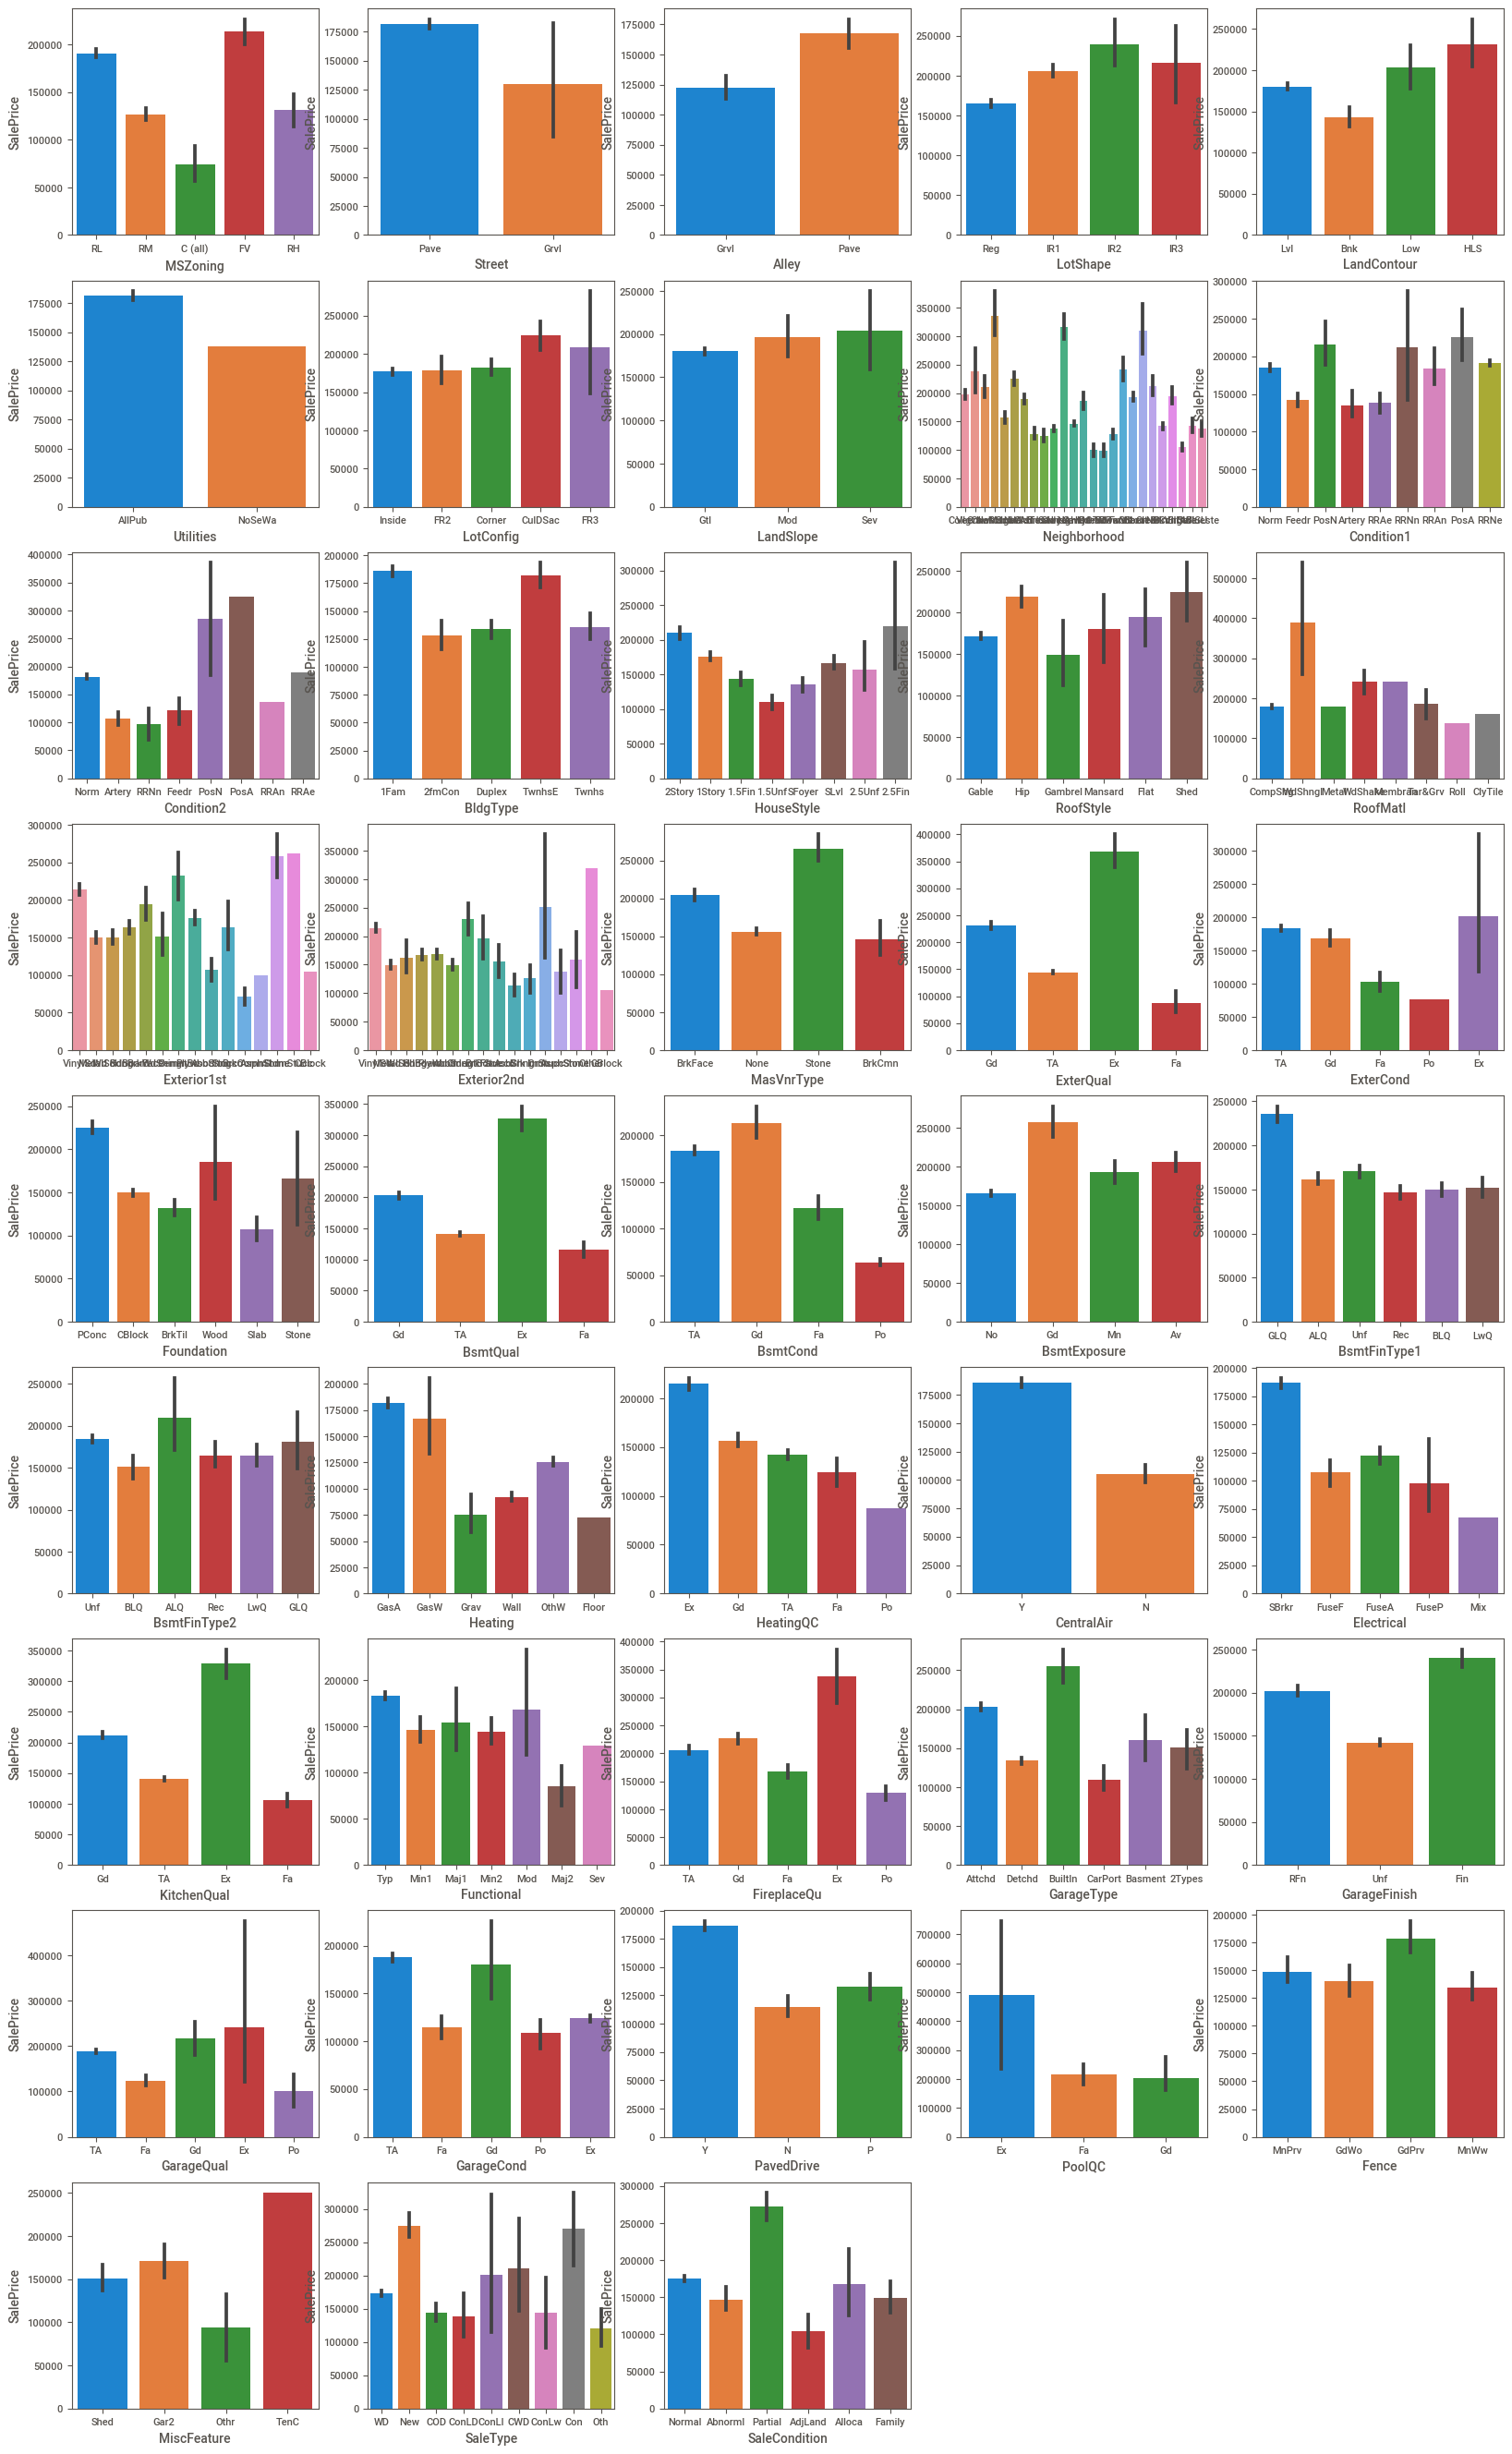

In [116]:
plt.figure(figsize=(20,50))
plotnumber=1
for i in df.select_dtypes(include='object'):
    plt.subplot(13,5,plotnumber)
    sns.barplot(data=df,x=i,y=df['SalePrice'])
    plotnumber+=1

# Step3 :- Data Preprocessing

In [15]:
# TO check the which columns have null value
nul=dict(df.isnull().sum())
null_column={}
for i in nul.items():
    if i[1]>0:
        null_column[i[0]]=i[1]

To display the null value columns

In [16]:
null_column

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

count the number of columns have null value

In [17]:
count=0
for i in nul.items():
    if i[1]>0:            # 19 columns have the null values
        count=count+1
print(count,'columns have the null values')        
        

19 columns have the null values


####  To check the outliers

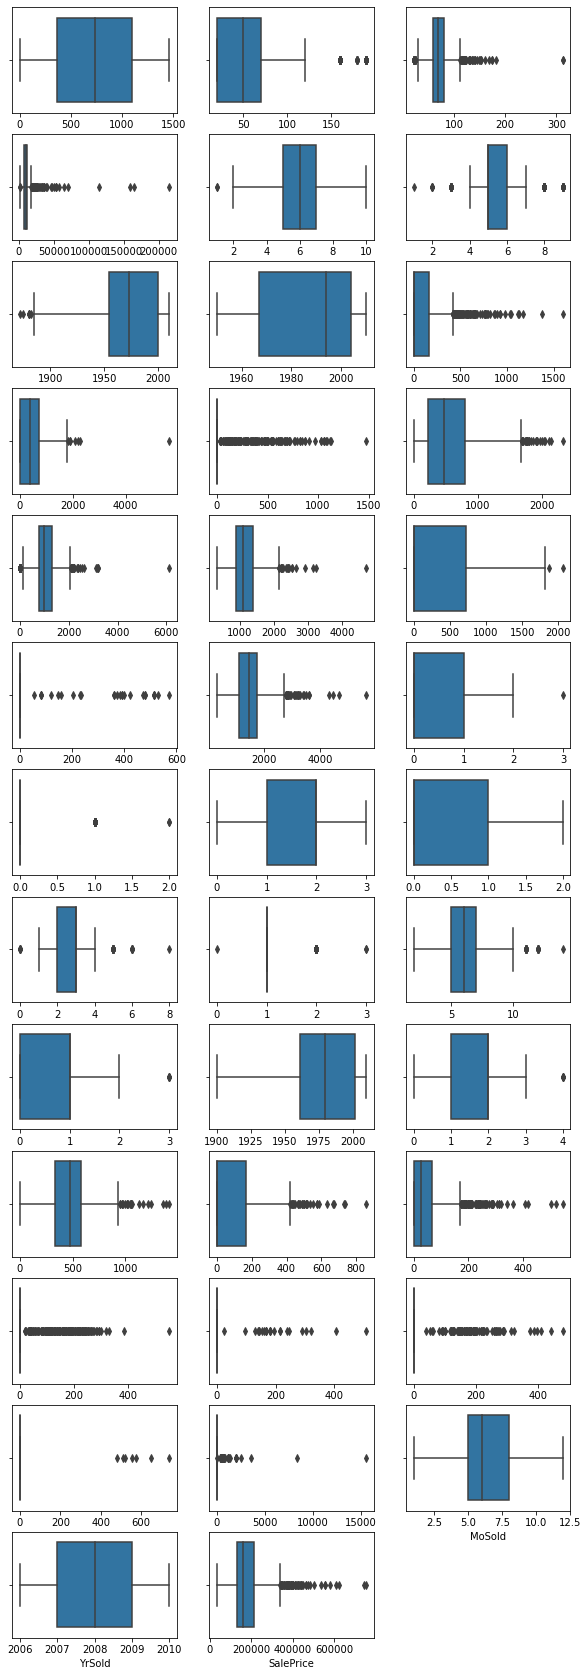

In [18]:

plt.figure(figsize=(10,30))
plotnumber=1
for i in df.select_dtypes(include=['int','float']):
    plt.subplot(13,3,plotnumber)
    sns.boxplot(data=df,x=i)
    plotnumber+=1

there is so many outlier is present we use robustic Normalisation

## To reomve th columns have more  20% of null value present

In [19]:
#the above 20% of null value present in columns to drop that columns

null_percent = df[[i for i in null_column]].isnull().sum()/df[[i for i in null_column]].shape[0]*100
col_for_drop = null_percent[null_percent > 20].keys() 
print(col_for_drop,' this column have above 20% of null value present')
df.drop(col_for_drop,axis=1,inplace=True)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')  this column have above 20% of null value present


## * To Fill the null values

In [20]:
# After remove the more than 20% null value present 
# to check the null value present in column
nul=dict(df.isnull().sum())
af_null_column={}
for i in nul.items():
    if i[1]>0:
        af_null_column[i[0]]=i[1]
af_null_column                            

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81}

In [21]:
# af_null_column is store the only null value present in columns

In [22]:
for i in af_null_column.keys():
    df[i]=df[i].fillna(df[i].mode()[0])    # to fill the all missing value {to replace null value
                                            # into mode of the individual column}

In [23]:
# to check the unique value of the columns

for i in df.select_dtypes(include='object'):
    p=df[i].value_counts()
    print(p,'\n')
    print('*'*8)    

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

********
Pave    1454
Grvl       6
Name: Street, dtype: int64 

********
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

********
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

********
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

********
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

********
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

********
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste     

## Convert the categorical data into numerical data

- - Converting the categorical data to numerical by mean encoding method
-  because it difficult to find out the order because more than 75 columns present

In [24]:
df.select_dtypes(include='object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [25]:
for i in (df.select_dtypes(include='object')):
    mean_encode=df.groupby(i)['SalePrice'].mean()   # to convert the all categorical data into numericle data
    df[i]=df[i].map(mean_encode)

# Feature selection

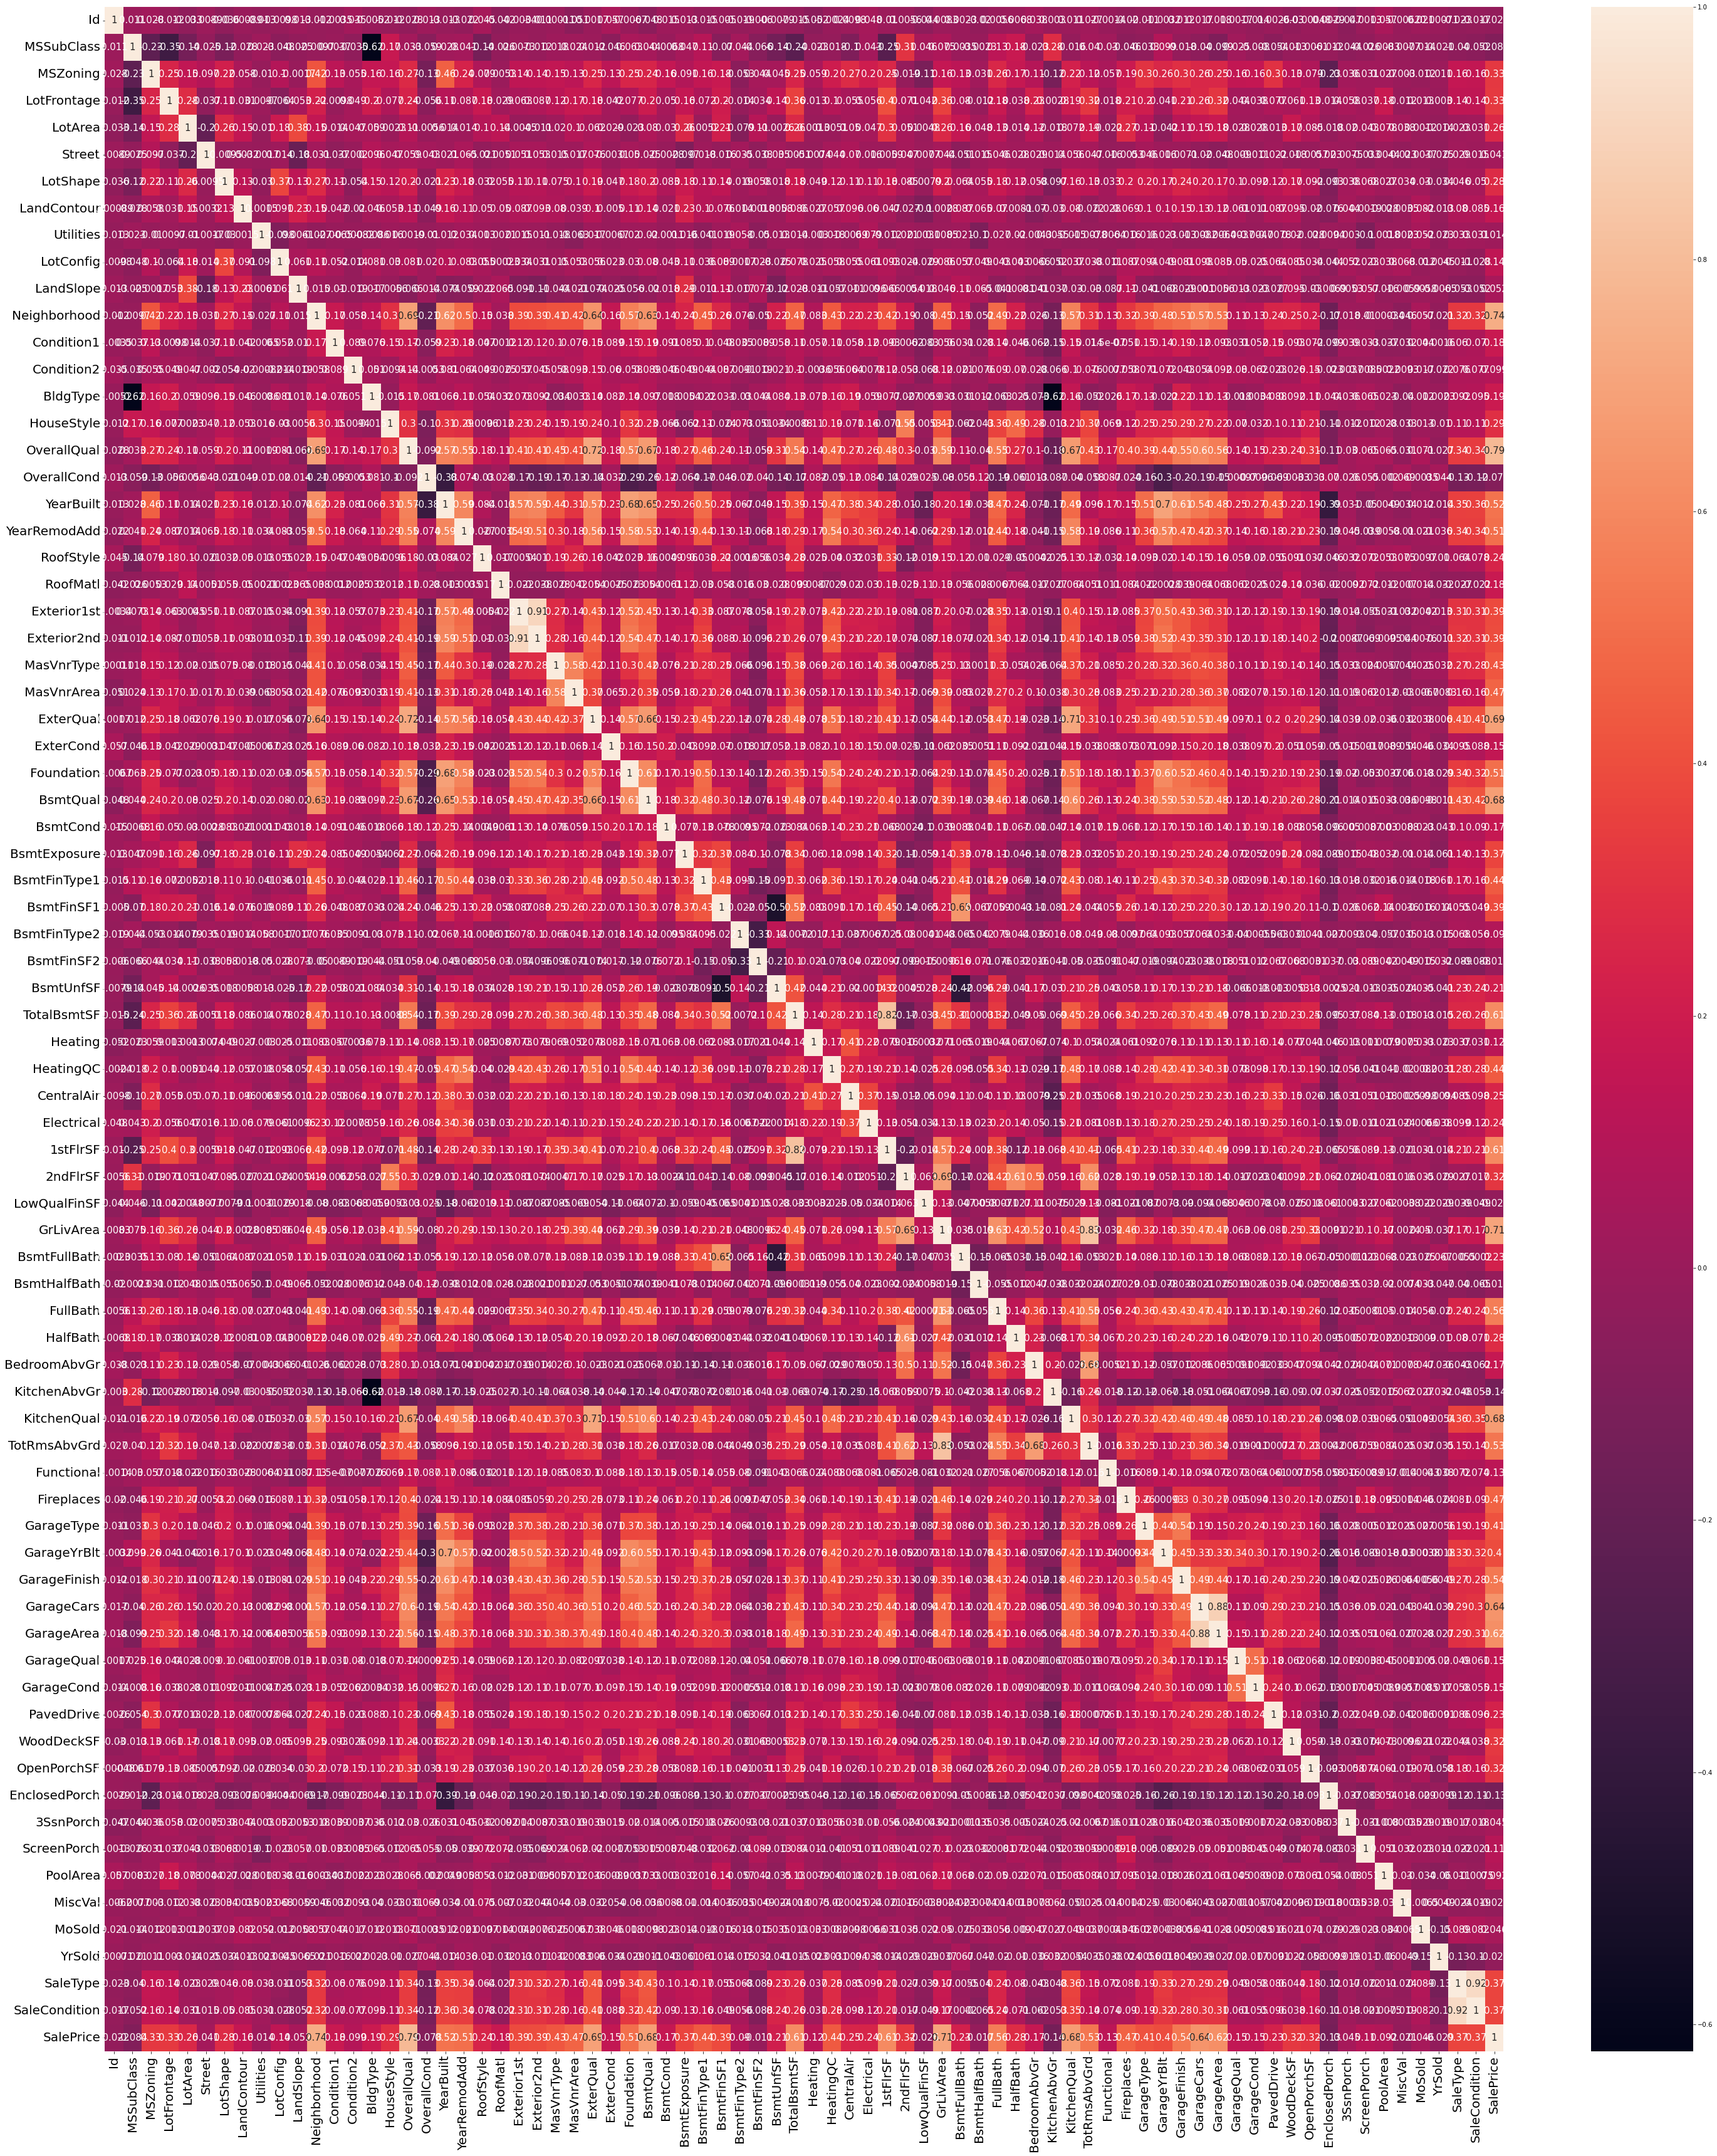

In [26]:
plt.figure(figsize=(50,60))
sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [26]:
# to find the more than 91 % of correlated column

def crr(data,threshold):
    s=set()
    corr=df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                colname=corr.columns[i]
                s.add(colname)
    return s            


In [27]:
crr(df,0.91)   # only one column is correlated with salesCondition with salestype column

{'SaleCondition'}

In [28]:
# to drop the SalesCondition column

df.drop('SaleCondition',axis=1,inplace=True)

In [29]:
df.drop('Id',axis=1,inplace=True)  # to drop the Id column because id is not use

In [30]:
cl=df.columns

In [31]:
df=pd.DataFrame(df,columns=cl)

# step4 :- To select the independent and dependent variable

In [31]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']                # x= independent & y is dependent

In [32]:
 # to select the training and test data
    
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)     

20% of data is taken test data and 80% of data taken train data

## Normalisation of data
   * To use robustic scalerisation because outliers are present

In [66]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [34]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#  Test_model function is the test all machine learning Algothinm

In [35]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, x_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

# Model evalution

## 1. Linear  Regression

In [36]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.7719834783593417]

In [37]:
test_model(LR)

[0.7719834783593417]

In [38]:
cross_validation = cross_val_score(estimator = LR, X = x_train, y = y_train, cv = 10)
print("Cross validation accuracy of LR model = ", cross_validation)
print("\nCross validation mean accuracy of LR model = ", cross_validation.mean())

Cross validation accuracy of LR model =  [0.15988619 0.76047342 0.87655604 0.81951628 0.89544304 0.88821722
 0.90028012 0.85565604 0.90137194 0.93319214]

Cross validation mean accuracy of LR model =  0.7990592428462315


## hyper parameter of LinearRegression

In [65]:
rdg = linear_model.Ridge()
test_model(rdg)             # to call the test model function

[0.7728686565348549]

In [40]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.7719834852962709]

## 2.SVM

In [41]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
test_model(svr_reg)

[-0.049369305762070326]

## 3.RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8581150687859763]

## 4. Xgboost

In [42]:

import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=51)
test_model(xgb_reg)

[12:01:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bbooster" } are not used.

[12:01:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bbooster" } are not used.

[12:01:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bbooster" } are not used.



[0.8612914297480189]

## Hyper parametre Tuning for RandomforestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid = {
    'n_estimators': [10,20,30,50,100,200,1000,2000]
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)



In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error on Test Set:", mse)


In [67]:
# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)
y_pred


NameError: name 'best_rf_model' is not defined

In [48]:
y_test

880     157000
605     205000
1166    245350
216     210000
970     135000
         ...  
218     311500
1228    367294
1007     88000
575     118500
599     151000
Name: SalePrice, Length: 292, dtype: int64

## Hyper parameter tuning for XGboostRegressor

In [64]:
xgb2_reg=xgboost.XGBRegressor(n_estimators= 899,
 mon_child_weight= 2,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')

xgb2_reg.fit(x_train,y_train)

score=xgb2_reg.score(x_train,y_train)
print('score of the train data is ',score)

[12:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "mon_child_weight" } are not used.

score of the train data is  0.9976305015833423


In [47]:
y_pred=xgb2_reg.predict(x_test)

In [48]:
y_pred    # To predict the data of x_test data

array([156514.75 , 203255.11 , 252272.56 , 194211.52 ,  94854.74 ,
       330561.06 , 168547.78 , 340876.8  , 417595.12 , 132107.55 ,
       193585.72 , 284574.8  , 170527.69 , 144023.64 , 149863.45 ,
       151021.8  , 227934.05 ,  93783.51 , 197351.8  ,  69459.44 ,
       185823.94 , 124826.586, 203230.14 , 105036.26 , 206267.66 ,
       614276.7  , 156846.48 , 155605.22 , 103929.2  , 146285.47 ,
       242452.1  , 132454.95 , 154768.61 , 145819.6  , 233910.03 ,
        89594.8  , 385625.2  , 151135.19 , 174483.62 , 203236.8  ,
       178550.11 , 170111.66 , 123088.836, 305747.44 ,  94102.21 ,
       160872.25 , 141084.55 , 364160.16 , 206662.42 , 255269.38 ,
       109778.77 , 199542.64 ,  84237.46 , 288562.72 , 264785.94 ,
       141029.03 ,  91384.73 , 183965.16 , 209524.9  , 229371.9  ,
       212234.9  , 111559.695, 144787.81 , 140610.95 , 136497.33 ,
       282130.72 , 140928.58 , 144524.94 , 118851.51 , 104571.164,
       108605.75 , 137410.98 , 163820.66 , 142719.27 , 131240.

In [49]:
y_test

880     157000
605     205000
1166    245350
216     210000
970     135000
         ...  
218     311500
1228    367294
1007     88000
575     118500
599     151000
Name: SalePrice, Length: 292, dtype: int64

## Evaluate the model performance

In [63]:

from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

r2 = r2_score(y_test, y_pred)
print('r2 score  on Test Set:',r2)


Mean Squared Error on Test Set: 987306482.653036
r2 score  on Test Set: 0.8543218188690629


In [61]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 31421.433491377124


In [62]:

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error : {mae}')b

Mean Absolute Error: 15259.815055115581


In [ ]:
#visulaise the which one is more accurrate for train data

In [ ]:

model_names = ['linear', 'svm', 'randomforest', 'xgboost']
accuracies = [0.85, 0.89, 0.85, 0.86]

data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center')

plt.show()

In [ ]:
#visulaise the which one is more accurrate for train data for test data
model_names = ['linear', 'svm', 'randomforest', 'xgboost']
accuracies = [0.87, 0.81, 0.85, 0.99]

data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center')

plt.show()

# Conclusion

We have used four algorithms to train and predict our model in which every algorithms has given
the different result but the accuracy of Random `XGBoosting` is hightest among them that is `accuracy = 86.15%`.
So after that we have applied the hyperparameter tunning on the XGBoosting algorithm in that we got the little increase
in the accuracy that is `accuracy=99.76%`. Hence we can say that theXGBoosting is the best algorithm to predict the House Price prediction

# Reports on challenges faced

- One of the first challenge faced by us is to analyze the columns of the dataset as there are many in columns in thisdataset.
- It was very difficult write observations for graphs because there are many graphs in the dataset.
- In this dataset have so many null values present to replace the null values into mode of the individul value
    And we didn't got the good accuracy in first algorithms but after that hyperparameter tunning result was better.



In [1]:
s="this is my book"
for i in s.split()[::-1]:
    print(i,end=' ')


book my is this 

In [15]:
h=dict()
for i in s:
    if i in h.keys():
        h[i]+=1
    else:
        h[i]=1
sorted(h.items())

[(' ', 3),
 ('b', 1),
 ('h', 1),
 ('i', 2),
 ('k', 1),
 ('m', 1),
 ('o', 2),
 ('s', 2),
 ('t', 1),
 ('y', 1)]

In [18]:
n=144
str(n)[2]

'4'

In [29]:
n=int(input())
l=str(n)
c=0
for i in range(len(str(n))):
        if l[i]=='4':
               c+=1
print(c)                

14
1


In [34]:
n=int(input())
c=0
for i in range(n+1):
    l=str(i)
    for k in range(len(l)):
        if l[k]=='4':
            c+=1
print(c)        

61
16


In [36]:
n=int(input('enter the number '))

enter the number 12
